In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [21]:
df_boston_housing_org = pd.read_csv('boston housing.csv')
df_boston_housing_org.head()

,0.000000000000000000e+00,1.799999999999999933e-01,6.781524926686217924e-02,0.000000000000000000e+00.1,3.148148148148147696e-01,5.775052692086607431e-01,6.416065911431514390e-01,2.692031390664641477e-01,0.000000000000000000e+00.2,2.080152671755724492e-01,...,5.974906610362189924e-02,2.080152671755724214e-01,1.865479079251132835e-02,8.250339520144869820e-02,2.872340425531915709e-01,2.575912357334086619e-02,9.999999999999997780e-01,8.967991169977924948e-02,8.042486562480206241e-03,2.400000000000000000e+01
0,0.000236,0.0,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808,21.6
1,0.000236,0.0,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028,34.7
2,0.000293,0.0,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115,33.4
3,0.000705,0.0,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868,36.2
4,0.000264,0.0,0.063050,0.0,0.150206,0.549722,0.574665,0.448545,0.086957,0.066794,...,0.043345,0.066326,0.006414,0.421118,0.644387,0.062315,0.986029,0.095353,0.009221,28.7


In [22]:
df_boston_housing_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Columns: 105 entries, 0.000000000000000000e+00 to 2.400000000000000000e+01
dtypes: float64(105)
memory usage: 414.4 KB


In [23]:
df_boston_housing_org.isna().sum().value_counts()

0    105
Name: count, dtype: int64

In [24]:
df_boston_housing_org.dropna(inplace=True)

In [25]:
df_boston_housing_org.shape

(505, 105)

In [26]:
df_boston_housing_org.duplicated().sum()

np.int64(0)

In [27]:
df_boston_housing_org.describe()

,0.000000000000000000e+00,1.799999999999999933e-01,6.781524926686217924e-02,0.000000000000000000e+00.1,3.148148148148147696e-01,5.775052692086607431e-01,6.416065911431514390e-01,2.692031390664641477e-01,0.000000000000000000e+00.2,2.080152671755724492e-01,...,5.974906610362189924e-02,2.080152671755724214e-01,1.865479079251132835e-02,8.250339520144869820e-02,2.872340425531915709e-01,2.575912357334086619e-02,9.999999999999997780e-01,8.967991169977924948e-02,8.042486562480206241e-03,2.400000000000000000e+01
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,...,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,0.040624,0.113505,0.392018,0.069307,0.349235,0.521759,0.676432,0.242328,0.372449,0.422632,...,0.297547,0.347010,0.161950,0.441690,0.550879,0.205053,0.860037,0.254589,0.129840,22.529901
std,0.096758,0.233437,0.251315,0.254227,0.238663,0.134737,0.290179,0.191668,0.378589,0.321813,...,0.284770,0.284129,0.194591,0.250332,0.252103,0.168345,0.265797,0.178537,0.161825,9.205991
min,0.000031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000853,0.000000,0.173387,0.000000,0.131687,0.445296,0.433574,0.088243,0.130435,0.175573,...,0.087624,0.158193,0.026204,0.260751,0.400056,0.072035,0.894178,0.117933,0.021227,17.000000
50%,0.002842,0.000000,0.338343,0.000000,0.314815,0.507185,0.770340,0.188198,0.173913,0.272901,...,0.142115,0.225572,0.065925,0.478158,0.615979,0.156108,0.972604,0.219371,0.070905,21.200000
75%,0.041271,0.125000,0.646628,0.000000,0.491770,0.587086,0.939238,0.371223,1.000000,0.914122,...,0.739077,0.440625,0.257902,0.653689,0.759622,0.311669,0.996523,0.345408,0.176613,25.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.797872,1.000000,0.914122,1.000000,0.964446,0.825020,1.000000,1.000000,1.000000,50.000000


In [28]:
X = df_boston_housing_org.iloc[:,:-1]
y = df_boston_housing_org.iloc[:,-1]
y

0      21.6
1      34.7
2      33.4
3      36.2
4      28.7
       ... 
500    22.4
501    20.6
502    23.9
503    22.0
504    11.9
Name: 2.400000000000000000e+01, Length: 505, dtype: float64

In [29]:
corr_matrix = df_boston_housing_org.corr()
top_post_corr = corr_matrix[df_boston_housing_org.columns[-1]].sort_values(ascending=False).head(4).index[1:]

In [30]:
least_neg_corr = corr_matrix[df_boston_housing_org.columns[-1]].sort_values(ascending=True).head(15).index

In [31]:
results_dict = {}
for i in range(1,4):
  poly = PolynomialFeatures(degree=i)
  X_poly = poly.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  results_dict[i] = {'r2': r2, 'mae': mae, 'mse': mse, 'rmse': rmse}

In [32]:
pd.DataFrame(results_dict)

,1,2,3
r2,0.834257,-15.711319,-2.829763
mae,2.230437,15.289507,7.976342
mse,9.235566,931.190722,213.402650
rmse,3.039007,30.515418,14.608308


In [33]:
sizes = np.linspace(start=2, stop=len(X_train), num=20)
sizes = sizes.astype(int)
sizes

array([  2,  23,  44,  65,  86, 107, 128, 150, 171, 192, 213, 234, 255,
       277, 298, 319, 340, 361, 382, 404])

In [34]:
test_r2_score = []
train_r2_score = []
for size in sizes:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  lr = LinearRegression()
  lr.fit(X_train[:size], y_train[:size])
  y_pred = lr.predict(X_test)
  train_r2_score.append(r2_score(y_train[:size], lr.predict(X_train[:size])))
  test_r2_score.append(r2_score(y_test, y_pred))

print(train_r2_score)
print(test_r2_score)

[1.0, 1.0, 1.0, 1.0, 1.0, 0.9986762564081014, 0.9891100471513697, 0.9774460250821383, 0.9720792509034307, 0.9692176299736108, 0.9647225041079255, 0.947894967059257, 0.946563947633642, 0.9434197839994858, 0.9394914658202513, 0.9403683808643132, 0.9384626396042941, 0.9350107928917699, 0.9365342514561265, 0.9340313859280017]
[0.17224347640915127, -0.5717798846365258, -1.0785796206227563, -14.693428326203536, -56.41886396070865, -23.785723528556954, -3.118108412576783, -0.8719724689646324, -0.14314913915356442, -6.0926611044094, -3.53571873169155, -1.7043474184776506, -0.8479699944726877, 0.6984501524248409, 0.7296278919416072, 0.7595801219645982, 0.8133148060184494, 0.8030495574773608, 0.8259422332066871, 0.834256840791402]


Text(0, 0.5, 'r2 score')

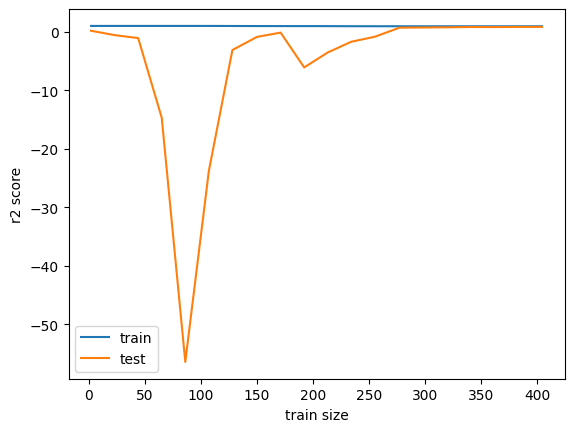

In [35]:
plt.plot(sizes, np.array(train_r2_score), label='train')
plt.plot(sizes, np.array(test_r2_score), label='test')
plt.legend()
plt.xlabel('train size')
plt.ylabel('r2 score')